In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as st
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data prep

In [60]:
# read in the data
df = pd.read_csv('/Users/hayleeham/Documents/what-is-a-data-scientist/data/multipleChoiceResponses.csv', \
                 low_memory=False)

In [3]:
[print(item) for item in zip(df.columns, df.iloc[0])]

('Time from Start to Finish (seconds)', 'Duration (in seconds)')
('Q1', 'What is your gender? - Selected Choice')
('Q1_OTHER_TEXT', 'What is your gender? - Prefer to self-describe - Text')
('Q2', 'What is your age (# years)?')
('Q3', 'In which country do you currently reside?')
('Q4', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')
('Q5', 'Which best describes your undergraduate major? - Selected Choice')
('Q6', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice')
('Q6_OTHER_TEXT', 'Select the title most similar to your current role (or most recent title if retired): - Other - Text')
('Q7', 'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice')
('Q7_OTHER_TEXT', 'In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text')
('Q8', 'How many years of experience

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [74]:
# remove students
df = df[df['Q7'] != 'I am a student']
df = df[df['Q6'] != 'Student']

In [75]:
# Are you a data scientist?
df_yes = df[df['Q26'] == 'Definitely yes']
df_no = df[df['Q26'] == 'Definitely not']
df_probably_yes = df[df['Q26'] == 'Probably yes']
df_probably_not = df[df['Q26'] == 'Probably not']
df_maybe = df[df['Q26'] == 'Maybe']

In [101]:
# What is your title
job_titles = df['Q6'].value_counts().index
job_titles = job_titles[:-1]

In [77]:
# Q11
# Analyze and understand data to influence product or business decisions
# Build and/or run a machine learning service that operationally improves my product or workflows
# Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data
# Build prototypes to explore applying machine learning to new areas
# Do research that advances the state of the art of machine learning
# None of these activities are an important part of my role at work

# Q34
# 1- Gathering data
# 2- Cleaning data
# 3- Visualizing data
# 4- Model building/model selection
# 5- Putting the model into production
# 6- Finding insights in the data and communicating with stakeholders

## Make a joyplot of time spent for yes DS vs not DS
This compares the distributions of time spent for definitely yes a DS and definitely not a DS.   

In [78]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

In [79]:
df_joy_yes = df_yes[['Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6']].iloc[1:]
# df_joy['Q34_Part_1'] = astype)
df_joy_yes['Q34_Part_1'] = pd.to_numeric(df_joy_yes['Q34_Part_1'])
df_joy_yes['Q34_Part_2'] = pd.to_numeric(df_joy_yes['Q34_Part_2'])
df_joy_yes['Q34_Part_3'] = pd.to_numeric(df_joy_yes['Q34_Part_3'])
df_joy_yes['Q34_Part_4'] = pd.to_numeric(df_joy_yes['Q34_Part_4'])
df_joy_yes['Q34_Part_5'] = pd.to_numeric(df_joy_yes['Q34_Part_5'])
df_joy_yes['Q34_Part_6'] = pd.to_numeric(df_joy_yes['Q34_Part_6'])
df_joy_yes = df_joy_yes.dropna()
df_joy_yes = df_joy_yes.rename(index=str, columns={'Q34_Part_1':'Gathering data','Q34_Part_2':'Cleaning data',\
                                      'Q34_Part_3':'Visualizing data','Q34_Part_4':'Model building',\
                                      'Q34_Part_5':'Model -> production','Q34_Part_6':'Finding insights/comm'})

df_joy_no = df_no[['Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6']].iloc[1:]
# df_joy['Q34_Part_1'] = astype)
df_joy_no['Q34_Part_1'] = pd.to_numeric(df_joy_no['Q34_Part_1'])
df_joy_no['Q34_Part_2'] = pd.to_numeric(df_joy_no['Q34_Part_2'])
df_joy_no['Q34_Part_3'] = pd.to_numeric(df_joy_no['Q34_Part_3'])
df_joy_no['Q34_Part_4'] = pd.to_numeric(df_joy_no['Q34_Part_4'])
df_joy_no['Q34_Part_5'] = pd.to_numeric(df_joy_no['Q34_Part_5'])
df_joy_no['Q34_Part_6'] = pd.to_numeric(df_joy_no['Q34_Part_6'])
df_joy_no = df_joy_no.dropna()
df_joy_no = df_joy_no.rename(index=str, columns={'Q34_Part_1':'Gathering data','Q34_Part_2':'Cleaning data',\
                                      'Q34_Part_3':'Visualizing data','Q34_Part_4':'Model building',\
                                      'Q34_Part_5':'Model -> production','Q34_Part_6':'Finding insights/comm'})

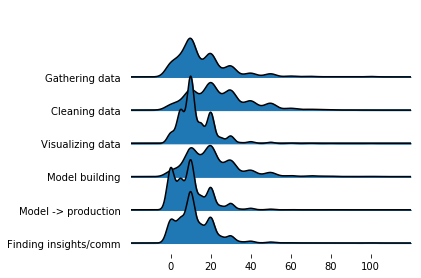

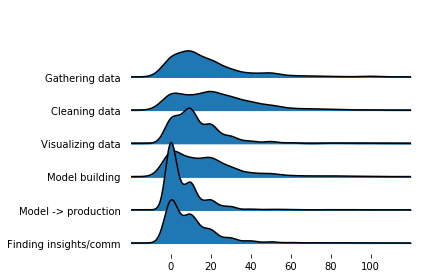

In [80]:
%matplotlib inline
fig, axes = joypy.joyplot(df_joy_yes)
fig, axes = joypy.joyplot(df_joy_no)

## Meeting with Mike
Approach like a multivariate problem   
Do principal components and see if you can reduce the dimension further.   
Chi square test is difference in proportions. So it would be share of events in two conditions. People falling into certain bucket.   
For Q11 -- use binomial for each one -- whether or not they marked it. -- You are comparing two treatments -- but is there an expanded one for multiple categories but probably not work for being able to mark multiple.   
They are responding with proportions so that is weird for the Chi square   
Mahalobis distance -- converting to probability space
-- don't average the obvservations
multivariate t-test using original vectors or multivariate regression   
PCA to understand which vectors explain most of the variance   

PCA all original vectors -- no averaging   
Multi t-test all original vectors -- no averaging

In [81]:
# create labeled sets for definitely yes and definitely not
df_yes_Q34 = df_yes[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']].copy()
df_no_Q34 = df_no[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']].copy()
df_yes_Q34 = df_yes_Q34[~pd.isnull(df_yes_Q34['Q34_Part_1'])]
df_no_Q34 = df_no_Q34[~pd.isnull(df_no_Q34['Q34_Part_1'])]

df_yes_Q34['DS'] = 1
df_no_Q34['DS'] = 0

df_Q34 = df_yes_Q34.append(df_no_Q34)

In [82]:
# create labeled sets for probably yes and probably not
df_probably_yes_Q34 = df_probably_yes[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']].copy()
df_probably_not_Q34 = df_probably_not[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']].copy()
df_probably_yes_Q34 = df_probably_yes_Q34[~pd.isnull(df_probably_yes_Q34['Q34_Part_1'])]
df_probably_not_Q34 = df_probably_not_Q34[~pd.isnull(df_probably_not_Q34['Q34_Part_1'])]

df_probably_yes_Q34['DS'] = 1
df_probably_not_Q34['DS'] = 0

df_probably_Q34 = df_probably_yes_Q34.append(df_probably_not_Q34)



In [83]:
# create set for maybe DS
df_maybe_Q34 = df_maybe[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']].copy()
df_maybe_Q34 = df_maybe_Q34[~pd.isnull(df_maybe_Q34['Q34_Part_1'])]



In [84]:
## PCA -- drop last category and run on remaining in order to reduce dimensionality
## nice if you can reduce down to two dimensions so you can look at plots
## X data is Q_34
## Y data is Q_26

from sklearn.decomposition import PCA
X = df_Q34[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5']]
Y = df_Q34[['DS']]
pca = PCA()
pca.fit(X)  
X = pca.transform(X)
print(pca.explained_variance_ratio_) 
print(pca.singular_values_)

[0.34926399 0.30489783 0.15943465 0.12283694 0.06356659]
[1158.12337272 1082.06932309  782.47284881  686.81917759  494.07441989]


### Plot Yes vs No DS on first two components of PCA

In [85]:
# use first two components and plot everything with color for DS status
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

source = ColumnDataSource(dict(
    x=X[:, 0],
    y=X[:, 1],
    colors = ['red' if target == 1 else 'blue' for target in Y['DS'].tolist()],
    labels = ['Yes DS' if target == 1 else 'No DS' for target in Y['DS'].tolist()]
))

p = figure()

p.scatter('x', 'y',
          fill_color='colors', fill_alpha=0.6,
          line_color=None, legend='labels', source=source)

show(p)


Loading BokehJS ...

### PCA components interpretation
PC1 seems to be capturing the difference between cleaning data and model building/model selection.    
The direction of the t-test is consistent with the idea that PC1 is capturing seniority level or skill level and that Yes DS has a higher average PC1 value than No DS   
PC2 is differentiating between data gathering vs data cleaning & model building/modeling selection.    
Possibly even lower seniority or maybe just a different role altogether.

In [86]:
# Q34
# 1- Gathering data
# 2- Cleaning data
# 3- Visualizing data
# 4- Model building/model selection
# 5- Putting the model into production
# 6- Finding insights in the data and communicating with stakeholders

# which features are the most important? Each row is a PC and each column is a variable
# Looking at PC1 -- variables 2 and 4 are the most important.
# These variables are cleaning data and model building/model selection
print(pca.components_)

[[-0.24317577 -0.67952194 -0.03393217  0.67023435  0.16955825]
 [ 0.7796347  -0.55403969 -0.05588827 -0.28599772  0.01707516]
 [-0.47141023 -0.38762964  0.44333712 -0.60566395  0.25325685]
 [-0.08846586  0.06011178 -0.68709161 -0.18183057  0.69527198]
 [ 0.32090726  0.27824413  0.5719112   0.26286886  0.65070445]]


In [87]:
# t-test with first component and DS/non-DS
from scipy import stats
stats.ttest_ind(X[:4201, 0],X[4201:, 0])

Ttest_indResult(statistic=1.3613299410318027, pvalue=0.17347910514971573)

In [88]:
# Yes DS mean of PC
sum(X[:4201, 0])/len(X[:4201, 0])

0.07887117100693719

In [89]:
# No DS mean of PC
sum(X[4201:, 0])/len(X[4201:, 0])

-1.6242048500007251

In [103]:
# Run PCA for all responses to Q11
df_pca = df.iloc[1:,]
df_pca = df_pca[~pd.isnull(df_pca['Q34_Part_1'])]
y_pca = df_pca['Q26']
X_pca = df_pca[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5']]
pca_pca = PCA()
pca_pca.fit(X_pca)  
X_pca = pca.transform(X_pca)
print(pca_pca.explained_variance_ratio_) 
print(pca_pca.singular_values_)
print(pca.components_)

[0.34809811 0.30553152 0.16251825 0.12141664 0.06243547]
[1931.11879987 1809.19829527 1319.49949223 1140.50520078  817.85039191]
[[-0.24317577 -0.67952194 -0.03393217  0.67023435  0.16955825]
 [ 0.7796347  -0.55403969 -0.05588827 -0.28599772  0.01707516]
 [-0.47141023 -0.38762964  0.44333712 -0.60566395  0.25325685]
 [-0.08846586  0.06011178 -0.68709161 -0.18183057  0.69527198]
 [ 0.32090726  0.27824413  0.5719112   0.26286886  0.65070445]]


In [104]:
# use first two components and plot everything with color for DS status
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

source = ColumnDataSource(dict(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    colors = ['#0B6623' if target == 'Definitely yes' else '#800000' if target == 'Definitely not' else '#FFE119' if target == 'Maybe' else '#FF0012' if target == 'Probably not' else '#00FF3E' for target in y_pca.tolist()],
    labels = ['Definitely yes' if target == 'Definitely yes' else 'Definitely not' if target == 'Definitely not' else 'Maybe' if target == 'Maybe' else 'Probably not' if target == 'Probably not' else 'Probably yes' for target in y_pca.tolist()]
))

p = figure()

p.scatter('x', 'y',
          fill_color='colors', fill_alpha=0.6,
          line_color=None, legend='labels', source=source)

show(p)


Loading BokehJS ...

In [105]:
# make the data types numeric for T2 test
for col in ['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']:
    df_no_Q34[col] = pd.to_numeric(df_no_Q34[col])
    df_yes_Q34[col] = pd.to_numeric(df_yes_Q34[col])
    df_probably_not_Q34[col] = pd.to_numeric(df_probably_not_Q34[col])
    df_probably_yes_Q34[col] = pd.to_numeric(df_probably_yes_Q34[col])
    df_maybe_Q34[col] = pd.to_numeric(df_maybe_Q34[col])

In [106]:
# regression framework looking at time vectors as a function of job title, dep var is time vectors, coef are also time vectors
# also look at BLS job titles -- check how many of them are categorized at that level
# one track to look at the regression framework to see what diff exist across job titles
# another track would be to try to build up categories from the data, PCA and clustering and see how that compares to job titles

In [107]:
# Hotelling's T2 test -- the means of the time spent vectors are statistically different between ALL groups
import os
from matplotlib import pyplot
import spm1d

# numpy array of arrays for each sample using original data
ds_array = np.array(df_yes_Q34[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']])
no_ds_array = np.array(df_no_Q34[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']])

# using first two PCs
# ds_array_pca, no_ds_array_pca = X[:4201, :2],X[4201:, :2]

# Conduct test:
alpha        = 0.05
T2           = spm1d.stats.hotellings2(ds_array, no_ds_array)
T2i          = T2.inference(alpha)

print(T2i)




SPM{T2} (0D) inference
   SPM.z        :  394.29227
   SPM.df       :  (6.0, 4403.0)
Inference:
   SPM.alpha    :  0.050
   SPM.zstar    :  12.61822
   SPM.h0reject :  True
   SPM.p        :  0.00000




In [236]:
# chance of not making an error 0.95^n-times (how many times running a hypothesis)
# so you can't use the below in a paper
# things you can do: Bonferroni correction like increase the sig to 0.99999
# that is very conservative, because it doesn't take into account correlation (multiplying probabilities only works if they are orthogonal, if they are aligned it won't drop off so much with the multiplier)
# more advanced things you can do like bootstrapping techniques (paper by John List multiple hypothesis testing) -- you can get an empirical distribution of the parameters and see how many these are together significant
# I can also use a holdout sample

In [109]:
# Now, let's see how each variable actually differs between group

# what about just a simple student's t test between the original vectors?
df_names = ['df_yes', 'df_probably_yes', 'df_maybe', 'df_probably_not', 'df_no']
col_names = ['Gathering data', 'Cleaning data', 'Visualizing data', 'Model building/model selection',
          'Putting the model into production', 'Finding insights / communicating with stakeholders']
for i1, df1 in enumerate([df_yes_Q34, df_probably_yes_Q34, df_maybe_Q34, df_probably_not_Q34, df_no_Q34]):
    for i2, df2 in enumerate([df_yes_Q34, df_probably_yes_Q34, df_maybe_Q34, df_probably_not_Q34, df_no_Q34]):
        if i1 >= i2:
            continue
        print(df_names[i1], '&', df_names[i2])
        for ic, col in enumerate(['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']):
            pval = stats.ttest_ind(df1[col],df2[col])[1]
            if pval < 0.0001:
                if df1[col].mean() > df2[col].mean():
                    print(df_names[i1], 'spends a stat sig greater amount of time on', col_names[ic])
                elif df1[col].mean() < df2[col].mean():
                    print(df_names[i2], 'spends a stat sig greater amount of time on', col_names[ic])
        
        print('\n\n')

df_yes & df_probably_yes
df_yes spends a stat sig greater amount of time on Putting the model into production



df_yes & df_maybe
df_yes spends a stat sig greater amount of time on Putting the model into production
df_yes spends a stat sig greater amount of time on Finding insights / communicating with stakeholders



df_yes & df_probably_not
df_probably_not spends a stat sig greater amount of time on Gathering data
df_yes spends a stat sig greater amount of time on Model building/model selection
df_yes spends a stat sig greater amount of time on Putting the model into production
df_yes spends a stat sig greater amount of time on Finding insights / communicating with stakeholders



df_yes & df_no
df_yes spends a stat sig greater amount of time on Model building/model selection
df_yes spends a stat sig greater amount of time on Putting the model into production
df_yes spends a stat sig greater amount of time on Finding insights / communicating with stakeholders



df_probably_yes & df

### Compare the clusters to the job title clusters and see if they align
If they aren't aligned then I can say that the way people spend time is not related to their job title.

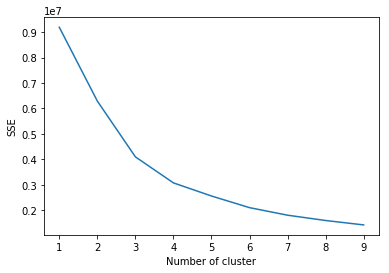

In [111]:
# pick n_clustrs based on SSE

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000).fit(points)
#     data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

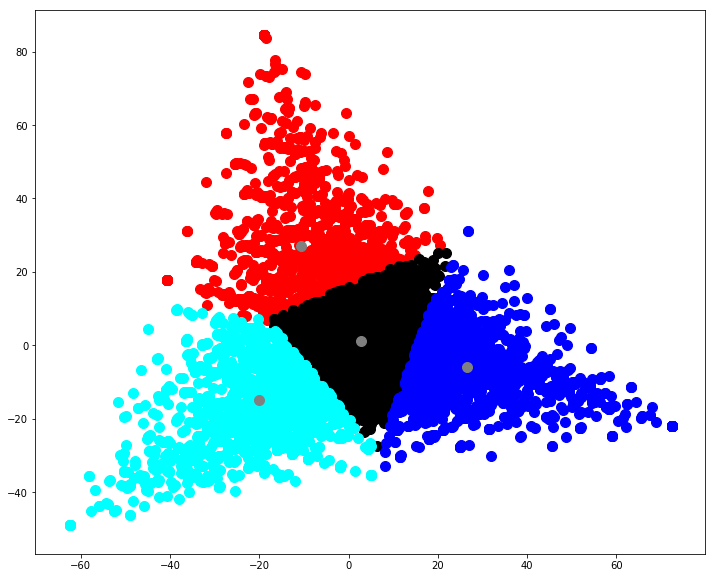

In [176]:
# and let's do some cluster analysis to see if anything interesting happens

# create kmeans object
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000)
# use the first two PCs as the points
points = X_pca[:, :2]
# fit kmeans object to data
kmeans.fit(points)
labels = kmeans.labels_
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['x', 'y'])
# save new clusters for chart
y_km = kmeans.fit_predict(points)

# plot
plt.figure(num=None, figsize=(12, 10))
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')
plt.scatter(centroids['x'], centroids['y'], s=100, c='grey')

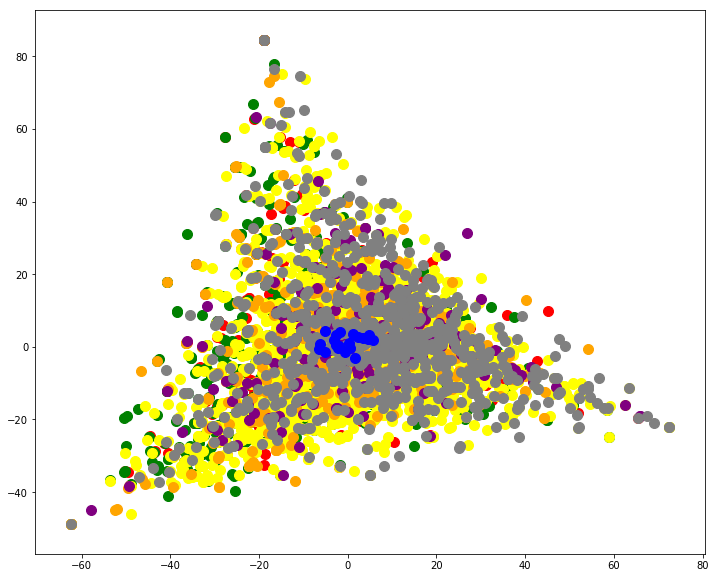

In [160]:
# each point has the cluster label and we have the centroid for each cluster
# each point also has its job title labeled
df_job_titles = df_pca[['Q6']].reset_index(drop=True)
df_job_titles = pd.concat([df_job_titles, pd.DataFrame(points, columns=['pc1', 'pc2']), 
                           pd.DataFrame(labels, columns=['cluster_label'])], axis=1)

# first compare centroids for each job title and centroids for the clusters and see which ones are similar
centroids_jobs = df_job_titles.groupby('Q6').mean()[['pc1', 'pc2']]
# plot the centroids and the points -- centroids in blue, points in red
plt.figure(num=None, figsize=(12, 10))
plt.scatter(df_job_titles[df_job_titles['Q6'] == 'Business Analyst']['pc1'], df_job_titles[df_job_titles['Q6'] == 'Business Analyst']['pc2'], s=100, c='red')
plt.scatter(df_job_titles[df_job_titles['Q6'] =='Data Analyst']['pc1'], df_job_titles[df_job_titles['Q6'] =='Data Analyst']['pc2'], s=100, c='green')
plt.scatter(df_job_titles[df_job_titles['Q6'] =='Data Scientist']['pc1'], df_job_titles[df_job_titles['Q6'] =='Data Scientist']['pc2'], s=100, c='yellow')
plt.scatter(df_job_titles[df_job_titles['Q6'] =='Data Engineer']['pc1'], df_job_titles[df_job_titles['Q6'] =='Data Engineer']['pc2'], s=100, c='orange')
plt.scatter(df_job_titles[df_job_titles['Q6'] =='Chief Officer']['pc1'], df_job_titles[df_job_titles['Q6'] =='Chief Officer']['pc2'], s=100, c='purple')
plt.scatter(df_job_titles[df_job_titles['Q6'] =='Research Scientist']['pc1'], df_job_titles[df_job_titles['Q6'] =='Research Scientist']['pc2'], s=100, c='grey')
plt.scatter(centroids_jobs['pc1'], centroids_jobs['pc2'], s=100, c='blue')



In [235]:
# what share of points assigned to particular cluster overlap with the points assigned to job title
## #(A intersection B)/#(AUB) or percents out of
cluster1 = df_job_titles[df_job_titles['cluster_label'] == 1]
cluster2 = df_job_titles[df_job_titles['cluster_label'] == 2]
cluster3 = df_job_titles[df_job_titles['cluster_label'] == 3]
cluster4 = df_job_titles[df_job_titles['cluster_label'] == 4]

df_clusters = [cluster1, cluster2, cluster3, cluster4]
    
for job in centroids_jobs.index.tolist():
    print(job)
    job_cluster = df_job_titles[df_job_titles['Q6'] == job]
    if job_cluster.shape[0] < 100:
        print('Less than 100 obvs \n')
        continue
    highest_percent = [0, 0]
    for num, df_cluster in enumerate(df_clusters):
#         print('Cluster', num+1)
        union = pd.concat([job_cluster, df_cluster],ignore_index=True).drop_duplicates().reset_index(drop=True)
        intersection = job_cluster[job_cluster['cluster_label'] == num+1]
        percent = intersection.shape[0] / union.shape[0]
        
#         print('Union', union.shape)
#         print('Intersection', intersection.shape)
#         print(percent)
#         print('\n')
        
        if percent > highest_percent[1]:
            highest_percent = [num+1, percent]
        
    print('Most overlap with cluster with overlap %:', highest_percent, '\n')
    


Business Analyst
Most overlap with cluster with overlap %: [3, 0.06131687242798354] 

Chief Officer
Most overlap with cluster with overlap %: [1, 0.02935903182429404] 

Consultant
Most overlap with cluster with overlap %: [1, 0.05647263249348393] 

DBA/Database Engineer
Most overlap with cluster with overlap %: [3, 0.011446886446886446] 

Data Analyst
Most overlap with cluster with overlap %: [3, 0.13920454545454544] 

Data Engineer
Most overlap with cluster with overlap %: [1, 0.05390659100829332] 

Data Journalist
Less than 100 obvs 

Data Scientist
Most overlap with cluster with overlap %: [1, 0.28200504868373605] 

Developer Advocate
Less than 100 obvs 

Manager
Most overlap with cluster with overlap %: [1, 0.04589371980676329] 

Marketing Analyst
Less than 100 obvs 

Not employed
Most overlap with cluster with overlap %: [1, 0.06465610761553482] 

Other
Most overlap with cluster with overlap %: [1, 0.08989941324392288] 

Principal Investigator
Less than 100 obvs 

Product/Project 

### Perform a regression on how cluster assignment affects job title (multinomial logit) (dep is job title) to get explanatory power

In [241]:
df_cluster_job = df_job_titles[
    (df_job_titles['Q6'] != 'Principal Investigator') & 
    (df_job_titles['Q6'] != 'Salesperson') & 
    (df_job_titles['Q6'] != 'Marketing Analyst') & 
    (df_job_titles['Q6'] != 'Developer Advocate') & 
    (df_job_titles['Q6'] != 'Data Journalist')
]

In [243]:
X = df_cluster_job['cluster_label']
y = df_cluster_job['Q6']
 
X = st.add_constant(X, prepend = False)

### specify the model
mdl = st.MNLogit(y, X)
mdl_fit = mdl.fit()
print(mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 2.335286
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                     Q6   No. Observations:                12038
Model:                        MNLogit   Df Residuals:                    12010
Method:                           MLE   Df Model:                           14
Date:                Wed, 14 Aug 2019   Pseudo R-squ.:                0.001358
Time:                        13:19:50   Log-Likelihood:                -28112.
converged:                       True   LL-Null:                       -28150.
                                        LLR p-value:                 1.279e-10
          Q6=Chief Officer       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
cluster_label                 -0.1286      0.079     -1.633      0.102      

### How does time spent affect compensation

In [245]:
# make sure using an ordinal logit
# make sure covariate matrix is full rank (avoid linear dependence)
# if not, try with smaller subset of data
# enter small subset results as starting point for full set
# replace categories with mean and do a linear regression
# dropped the nans

In [308]:
# regress compensation on how spend time

df_comp = df[['Q1', 'Q3', 'Q6', 'Q7', 'Q8', 'Q9', 'Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5']]
df_comp = df_comp.iloc[1:,]
df_comp = df_comp.dropna(subset=['Q8', 'Q9', 'Q34_Part_1'])
df_comp = df_comp[df_comp['Q9'] != 'I do not wish to disclose my approximate yearly compensation']
df_comp = df_comp[df_comp['Q7'] != 'I am a student']

# create gender bool
df_comp['gender'] = 0
df_comp.loc[df_comp['Q1'] == 'Male', 'gender'] = 1

# create country bools
df_comp['usa'] = 0
df_comp.loc[df_comp['Q3'] == 'United States of America', 'usa'] = 1
df_comp['india'] = 0
df_comp.loc[df_comp['Q3'] == 'India', 'india'] = 1
df_comp['china'] = 0
df_comp.loc[df_comp['Q3'] == 'China', 'china'] = 1

# create industry bools
df_comp['tech'] = 0
df_comp.loc[df_comp['Q7'] == 'Computers/Technology', 'tech'] = 1
df_comp['academia'] = 0
df_comp.loc[df_comp['Q7'] == 'Academics/Education', 'academia'] = 1

# create years of exp ints
df_comp.loc[df_comp['Q8'] == '0-1', 'exp'] = 0
df_comp.loc[df_comp['Q8'] == '1-2', 'exp'] = 1
df_comp.loc[df_comp['Q8'] == '2-3', 'exp'] = 2
df_comp.loc[df_comp['Q8'] == '3-4', 'exp'] = 3
df_comp.loc[df_comp['Q8'] == '4-5', 'exp'] = 4
df_comp.loc[df_comp['Q8'] == '5-10', 'exp'] = 5
df_comp.loc[df_comp['Q8'] == '10-15', 'exp'] = 6
df_comp.loc[df_comp['Q8'] == '15-20', 'exp'] = 7
df_comp.loc[df_comp['Q8'] == '20-25', 'exp'] = 8
df_comp.loc[df_comp['Q8'] == '25-30', 'exp'] = 9
df_comp.loc[df_comp['Q8'] == '30 +', 'exp'] = 10

In [309]:
# regress compensation on how spend time
# string to int for compensation level categories
# pd.Categorical(df_comp['Q9'])
comps = ['0-10,000', '10-20,000', '20-30,000', '30-40,000', 
         '40-50,000', '50-60,000', '60-70,000', '70-80,000',
         '80-90,000', '90-100,000', '100-125,000', '125-150,000',
         '150-200,000', '200-250,000', '250-300,000', '300-400,000',
         '400-500,000', '500,000+']

df_comp['y'] = df_comp['Q9'].astype(pd.api.types.CategoricalDtype(categories=comps)).cat.codes


In [310]:
# run this in R
df_comp.to_csv('compensation_data.csv')

### How does time spent affect job title

In [307]:
X = df_comp[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'academia', 'tech', 'gender', 'exp', 'usa', 'india', 'china']]
y = df_comp['Q6']

X = st.add_constant(X, prepend = False)
X = X.astype(float)

# specify the model
mdl = st.MNLogit(y, X)
mdl_fit = mdl.fit(method='newton')
print(mdl_fit.summary())

Optimization terminated successfully.
         Current function value: nan
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:                     Q6   No. Observations:                 9707
Model:                        MNLogit   Df Residuals:                     9473
Method:                           MLE   Df Model:                          216
Date:                Thu, 15 Aug 2019   Pseudo R-squ.:                     nan
Time:                        10:37:52   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -22632.
                                        LLR p-value:                       nan
          Q6=Chief Officer       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Q34_Part_1                        nan        nan        nan        nan         na

In [277]:
X.head()

,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,const
7,0.0,30.0,50.0,0.0,0.0,1.0
8,20.0,30.0,20.0,20.0,5.0,1.0
10,55.0,10.0,20.0,5.0,0.0,1.0
12,40.0,0.0,0.0,0.0,50.0,1.0
14,15.0,10.0,15.0,25.0,0.0,1.0


In [282]:
y.head()

7     11
8     11
10    17
12     7
14    14
Name: Q6_cat, dtype: int8

In [283]:
df_comp['y'].head()

7      1
8      0
10     2
12    11
14     3
Name: y, dtype: int8